In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import itertools
import patsy

Question 1
A consumer products company relies on direct mail marketing pieces as a major component of its advertising campaigns.
The company has three different designs for a new brochure and wants to evaluate their effectiveness, as there are substantial differences in costs between the three designs. The company decides to test the three designs by mailing 5000 samples of each to potential customers in four different regions of the country. Since there are known regional differences in the customer base, regions are considered as blocks. The number of responses to each mailing is as follows.

In [2]:
data = {
    "Design": [1, 2, 3],
    "NE": [250, 400, 275],
    "NW": [350, 525, 340],
    "SE": [219, 390, 200],
    "SW": [375, 580, 310]
}

df = pd.DataFrame(data)
df

,Design,NE,NW,SE,SW
0,1,250,350,219,375
1,2,400,525,390,580
2,3,275,340,200,310


In [3]:
df_long = df.melt(id_vars="Design", var_name="Region", value_name="Score")

# df_long already created as before
df_long["Design"] = df_long["Design"].astype("category")
df_long["Region"] = df_long["Region"].astype("category")

print("Long data:")
print(df_long, "\n")

Long data:
   Design Region  Score
0       1     NE    250
1       2     NE    400
2       3     NE    275
3       1     NW    350
4       2     NW    525
5       3     NW    340
6       1     SE    219
7       2     SE    390
8       3     SE    200
9       1     SW    375
10      2     SW    580
11      3     SW    310 


### Q1: Calculate the MSE

In [4]:
model = ols(
    "Score ~ C(Design) + C(Region)",
    data=df_long
).fit()

In [5]:
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Design),90755.166667,2.0,50.151751,0.000180
C(Region),49035.666667,3.0,18.064900,0.002084
Residual,5428.833333,6.0,NaN,NaN


In [6]:
MSE = 5428.833/6
print("Mean Squared Error: {}".format(MSE))

Mean Squared Error: 904.8054999999999


### Q2: Fisher LSD

In [7]:
# --- Fisher LSD pairwise comparisons ---
designs = sorted(df_long["Design"].unique())
ref_region = df_long["Region"].iloc[0]   # any region works

rows = []
for d1, d2 in itertools.combinations(designs, 2):
    X = patsy.dmatrix(
        model.model.data.design_info,
        pd.DataFrame({"Design": [d1, d2], "Region": [ref_region, ref_region]})
    )
    test = model.t_test(X[0] - X[1])

    rows.append({
        "Comparison": f"{d1} - {d2}",
        "Mean Diff": float(test.effect),
        "p (LSD)": float(test.pvalue)
    })

lsd_results = pd.DataFrame(rows)
lsd_results

C:\Users\YXY6X3U\AppData\Local\Temp\1\ipykernel_33244\887195267.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Mean Diff": float(test.effect),


,Comparison,Mean Diff,p (LSD)
0,1 - 2,-175.25,0.000173
1,1 - 3,17.25,0.448327
2,2 - 3,192.50,0.000102


### Q3: Normal Probability Plot of Residuals

In [8]:
# Residuals
fitted = model.fittedvalues
residuals = model.resid

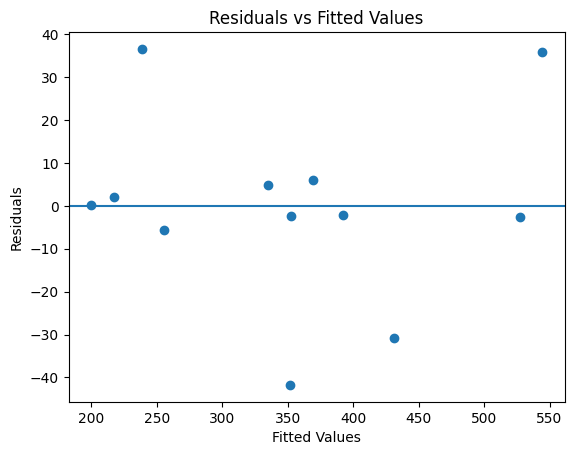

In [9]:

# Plot
plt.figure()
plt.scatter(fitted, residuals)
plt.axhline(0)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()


<Figure size 640x480 with 0 Axes>

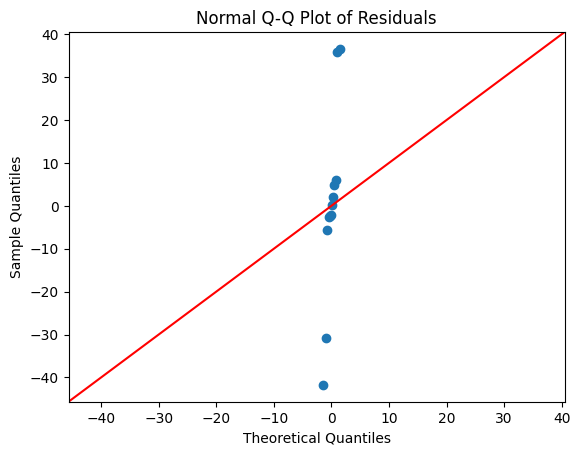

In [10]:
# Q-Q plot
plt.figure()
sm.qqplot(residuals, line="45")
plt.title("Normal Q-Q Plot of Residuals")
plt.show()